## Fully_Connected_Neural_Network

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist,fashion_mnist
import keras
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# X_train 60000 samples, each is 28*28 

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Baseline Model

In [0]:
model = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dense(512, activation = 'relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy",
              metrics=['accuracy'])

In [0]:
history_callback = model.fit(X_train, y_train, 
                             batch_size=128, epochs=45, verbose=1,validation_split=1/6)


Train on 50000 samples, validate on 10000 samples
Epoch 1/45
50000/50000 [==============================] - 8s 162us/step - loss: 0.4941 - acc: 0.8245 - val_loss: 0.4403 - val_acc: 0.8347
Epoch 2/45
50000/50000 [==============================] - 7s 149us/step - loss: 0.3591 - acc: 0.8685 - val_loss: 0.3628 - val_acc: 0.8688
Epoch 3/45
50000/50000 [==============================] - 7s 150us/step - loss: 0.3206 - acc: 0.8837 - val_loss: 0.3317 - val_acc: 0.8792
Epoch 4/45
50000/50000 [==============================] - 7s 146us/step - loss: 0.2939 - acc: 0.8921 - val_loss: 0.3413 - val_acc: 0.8754
Epoch 5/45
50000/50000 [==============================] - 7s 143us/step - loss: 0.2748 - acc: 0.8979 - val_loss: 0.3349 - val_acc: 0.8761
Epoch 6/45
50000/50000 [==============================] - 7s 142us/step - loss: 0.2617 - acc: 0.9017 - val_loss: 0.3303 - val_acc: 0.8777
Epoch 7/45
50000/50000 [==============================] - 7s 139us/step - loss: 0.2462 - acc: 0.9064 - val_loss: 0.3777 - 

Text(0, 0.5, 'loss')

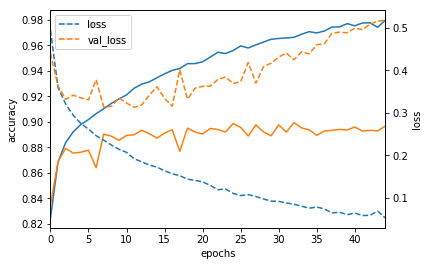

In [0]:
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
plt.xlabel("epochs")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")


In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.5594879250784638, 0.8962]

### model using drop-out (potentially a bigger model),

In [0]:
from keras.layers import Dropout
model_dropout = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dropout(.5),
    Dense(512, activation = 'relu'),
    Dropout(.5),
    Dense(10, activation='softmax'),
])
model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, batch_size=128,
                            epochs=45, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/45
54000/54000 [==============================] - 9s 167us/step - loss: 0.6281 - acc: 0.7750 - val_loss: 0.4260 - val_acc: 0.8465
Epoch 2/45
54000/54000 [==============================] - 8s 148us/step - loss: 0.4638 - acc: 0.8319 - val_loss: 0.3901 - val_acc: 0.8558
Epoch 3/45
54000/54000 [==============================] - 8s 147us/step - loss: 0.4281 - acc: 0.8449 - val_loss: 0.3639 - val_acc: 0.8638
Epoch 4/45
54000/54000 [==============================] - 8s 145us/step - loss: 0.4056 - acc: 0.8515 - val_loss: 0.3510 - val_acc: 0.8703
Epoch 5/45
54000/54000 [==============================] - 8s 147us/step - loss: 0.3928 - acc: 0.8557 - val_loss: 0.3445 - val_acc: 0.8757
Epoch 6/45
54000/54000 [==============================] - 8s 143us/step - loss: 0.3786 - acc: 0.8614 - val_loss: 0.3441 - val_acc: 0.8752
Epoch 7/45
54000/54000 [==============================] - 8s 146us/step - loss: 0.3703 - acc: 0.8648 - val_loss: 0.3413 - v

Text(0, 0.5, 'loss')

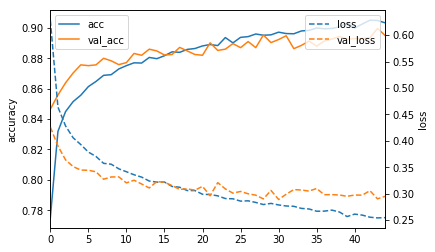

In [0]:
df = pd.DataFrame(history_dropout.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [0]:
score2 = model_dropout.evaluate(X_test, y_test, verbose=0)
score2

[0.3124411096572876, 0.8893]

### Model using batch normalization and residual connections (but not dropout).

In [0]:
from keras.layers import BatchNormalization, add
from keras.layers import Input, Dense
from keras.models import Model


In [11]:
inputs = Input(shape=(784,))
x1 = Dense(512, activation='relu')(inputs)
bn1 = BatchNormalization()(x1)
x2 = Dense(512, activation='relu')(bn1)


skip1 = add([x1, x2])
bn2 = BatchNormalization()(skip1)
predictions = Dense(10, activation='softmax')(bn2)
model_bn_res = Model(inputs=inputs, outputs=predictions)
model_bn_res.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_bn_res = model_bn_res.fit(X_train, y_train,  batch_size=128, epochs=45, verbose=1, validation_split=.1)
#model_bn_res.summary()

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/45
54000/54000 [==============================] - 12s 220us/step - loss: 0.4527 - acc: 0.8384 - val_loss: 0.4421 - val_acc: 0.8417
Epoch 2/45
54000/54000 [==============================] - 11s 206us/step - loss: 0.3540 - acc: 0.8709 - val_loss: 0.4150 - val_acc: 0.8577
Epoch 3/45
54000/54000 [==============================] - 11s 198us/step - loss: 0.3268 - acc: 0.8793 - val_loss: 0.4279 - val_acc: 0.8450
Epoch 4/45
54000/54000 [==============================] - 11s 198us/step - loss: 0.3049 - acc: 0.8860 - val_loss: 0.5532 - val_acc: 0.8377
Epoch 5/45
54000/54000 [==============================] - 10s 194us/step - loss: 0.2900 - acc: 0.8909 - val_loss: 0.3546 - val_acc: 0.8752
Epoch 6/45
54000/54000 [==============================] - 11s 195us/step - loss: 0.2768 - acc: 0.8965 - val_loss: 0.3648 - val_acc: 0.8715
Epoch 7/45
54000/54000 [==============================] - 10s 192us/s

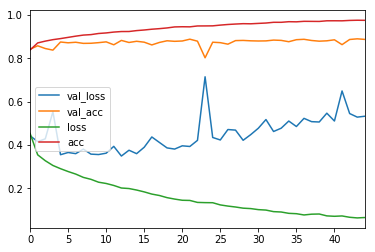

In [13]:
pd.DataFrame(history_bn_res.history).plot()

In [14]:
score3 = model_bn_res.evaluate(X_test, y_test, verbose=0)
score3

[0.5473387231767177, 0.8889]